In [1]:
# 导入Python的数据处理库pandas，相当于python里的excel
import pandas as pd

# 导入python高级数据可视化库seaborn
import seaborn as sns

# 导入python绘图matplotlib
import matplotlib.pyplot as plt

# 使用ipython的魔法方法，将绘制出的图像直接嵌入在notebook单元格中
%matplotlib inline

# 设置绘图大小
plt.style.use({'figure.figsize':(25,20)})

plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签  
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

# 安全人机工程学手指灵活性实验数据

本数据搜集自本班部分同学的相关实验数据。
其中包括性别、右手插拔次数、右手翻转次数、右手旋转次数、左手插拔次数、左手翻转次数、左手旋转次数七个变量。

# 导入数据集

## 从外部csv文件导入（csv文件是逗号分隔文件，在数据分析中常用此格式）

In [3]:
df_minedisease = pd.read_csv('手指灵活性测试数据分析用.csv',encoding='gbk')          

In [4]:
df_minedisease.head()  # 输出前五行数据

,性别,右手插拔次数,右手翻转次数,右手旋转次数,左手插拔次数,左手翻转次数,左手旋转次数
0,1,62,48,9,50,42,7
1,1,53,38,7,47,23,7
2,1,51,37,7,42,40,7
3,1,60,30,9,51,32,6
4,1,48,29,8,41,40,9


In [5]:
df_minedisease.shape  # 查看数据格式，16行10列

(27, 7)

# 数据探索性分析（EDA）

## 探索数据结构

In [6]:
df_minedisease.head() # 用.head方法可以看到前五行数据

,性别,右手插拔次数,右手翻转次数,右手旋转次数,左手插拔次数,左手翻转次数,左手旋转次数
0,1,62,48,9,50,42,7
1,1,53,38,7,47,23,7
2,1,51,37,7,42,40,7
3,1,60,30,9,51,32,6
4,1,48,29,8,41,40,9


In [7]:
df_minedisease.shape  # .shape 查看数据结构

(27, 7)

In [8]:
df_minedisease.dtypes # .dtypes 查看数据类型

性别        int64
右手插拔次数    int64
右手翻转次数    int64
右手旋转次数    int64
左手插拔次数    int64
左手翻转次数    int64
左手旋转次数    int64
dtype: object

In [9]:
df_minedisease.info() # .info查看有没有缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   性别      27 non-null     int64
 1   右手插拔次数  27 non-null     int64
 2   右手翻转次数  27 non-null     int64
 3   右手旋转次数  27 non-null     int64
 4   左手插拔次数  27 non-null     int64
 5   左手翻转次数  27 non-null     int64
 6   左手旋转次数  27 non-null     int64
dtypes: int64(7)
memory usage: 1.6 KB


In [10]:
df_minedisease.isnull().any().sum()

0

In [11]:
df_minedisease.describe() # .describe 得到每一列数据的统计特征

,性别,右手插拔次数,右手翻转次数,右手旋转次数,左手插拔次数,左手翻转次数,左手旋转次数
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,1.259259,45.000000,33.481481,7.037037,43.074074,33.666667,6.037037
std,0.446576,9.876156,11.839862,1.628626,6.075967,6.038339,1.604836
min,1.000000,16.000000,5.000000,4.000000,28.000000,19.000000,3.000000
25%,1.000000,41.000000,28.500000,6.000000,40.000000,30.500000,5.000000
50%,1.000000,46.000000,36.000000,7.000000,43.000000,34.000000,6.000000
75%,1.500000,50.000000,40.500000,8.000000,47.000000,37.500000,7.000000
max,2.000000,62.000000,49.000000,10.000000,55.000000,42.000000,9.000000


In [12]:
df_minedisease.corr() # .corr得到各变量两两之间的皮尔逊相关性系数

,性别,右手插拔次数,右手翻转次数,右手旋转次数,左手插拔次数,左手翻转次数,左手旋转次数
性别,1.000000,-0.017441,0.055499,-0.013710,-0.163272,0.218701,-0.335910
右手插拔次数,-0.017441,1.000000,0.096703,0.313248,0.523014,0.186388,0.230532
右手翻转次数,0.055499,0.096703,1.000000,0.240388,0.165759,0.155116,0.154887
右手旋转次数,-0.013710,0.313248,0.240388,1.000000,0.256240,0.001304,0.499782
左手插拔次数,-0.163272,0.523014,0.165759,0.256240,1.000000,0.073033,0.106207
左手翻转次数,0.218701,0.186388,0.155116,0.001304,0.073033,1.000000,0.140237
左手旋转次数,-0.335910,0.230532,0.154887,0.499782,0.106207,0.140237,1.000000


## 数据可视化

In [13]:
# 设置绘图大小，长15高10
plt.style.use({'figure.figsize':(15,10)})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027D93898080>,
      dtype=object)

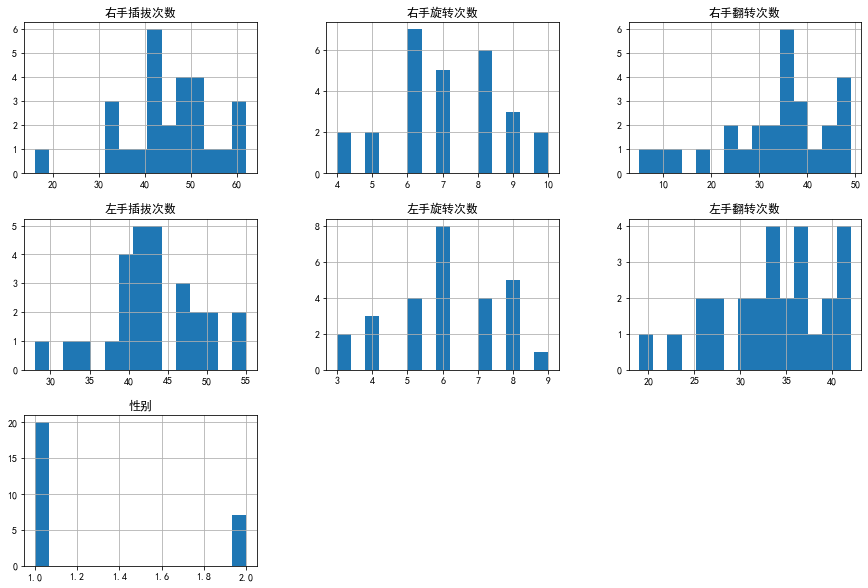

In [14]:
df_minedisease.hist(bins=15) # 分15个区段

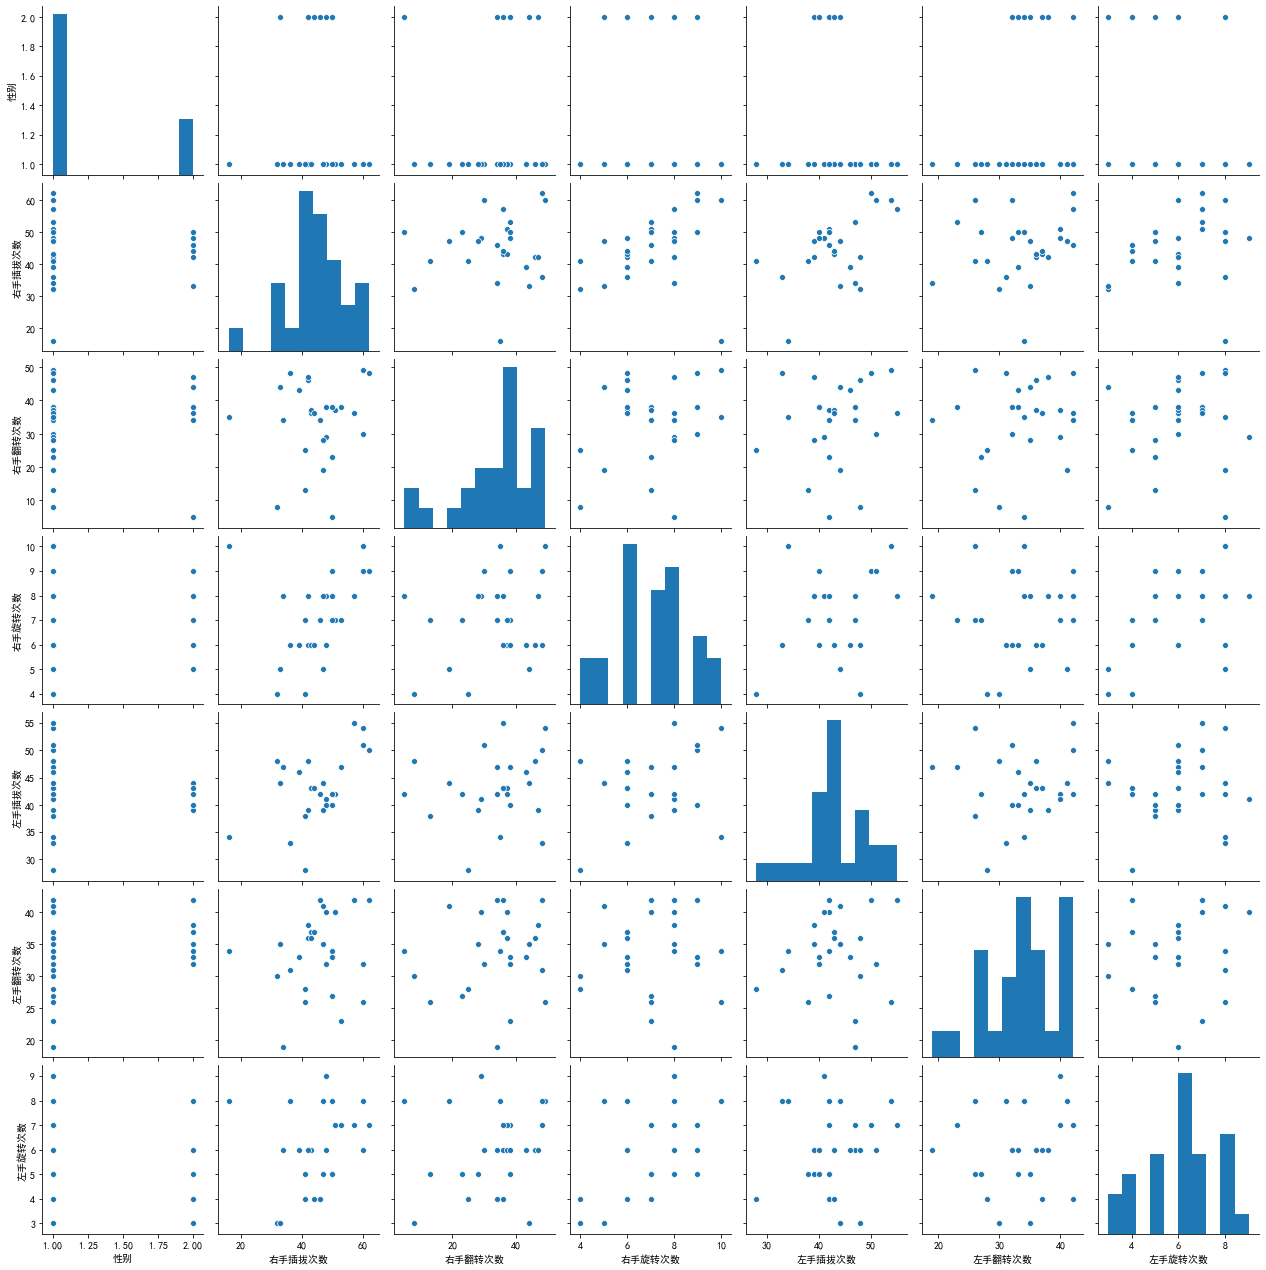

In [15]:
# 绘制变量之间两两关系的散点图，绘制这个图可能要花一分钟左右
sns.pairplot(df_minedisease)

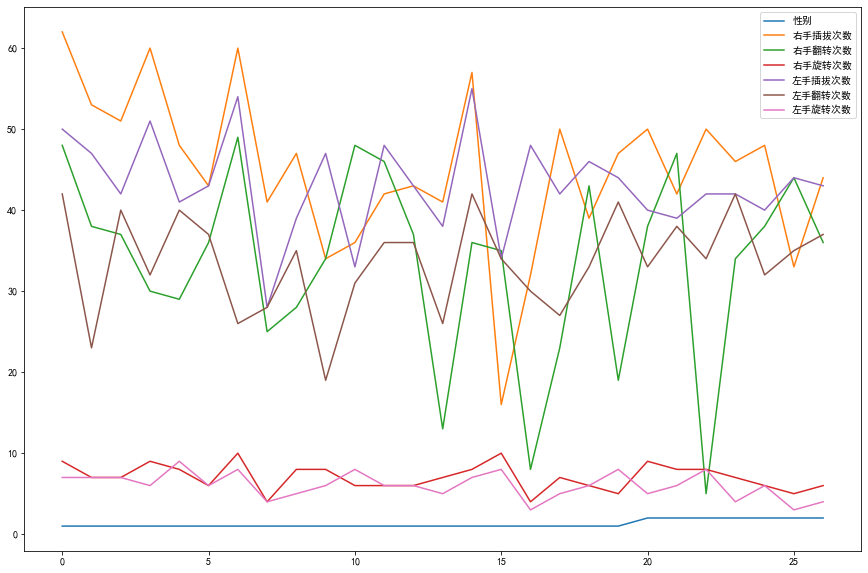

In [16]:
df_minedisease.plot() # 画出所有变量的折线图

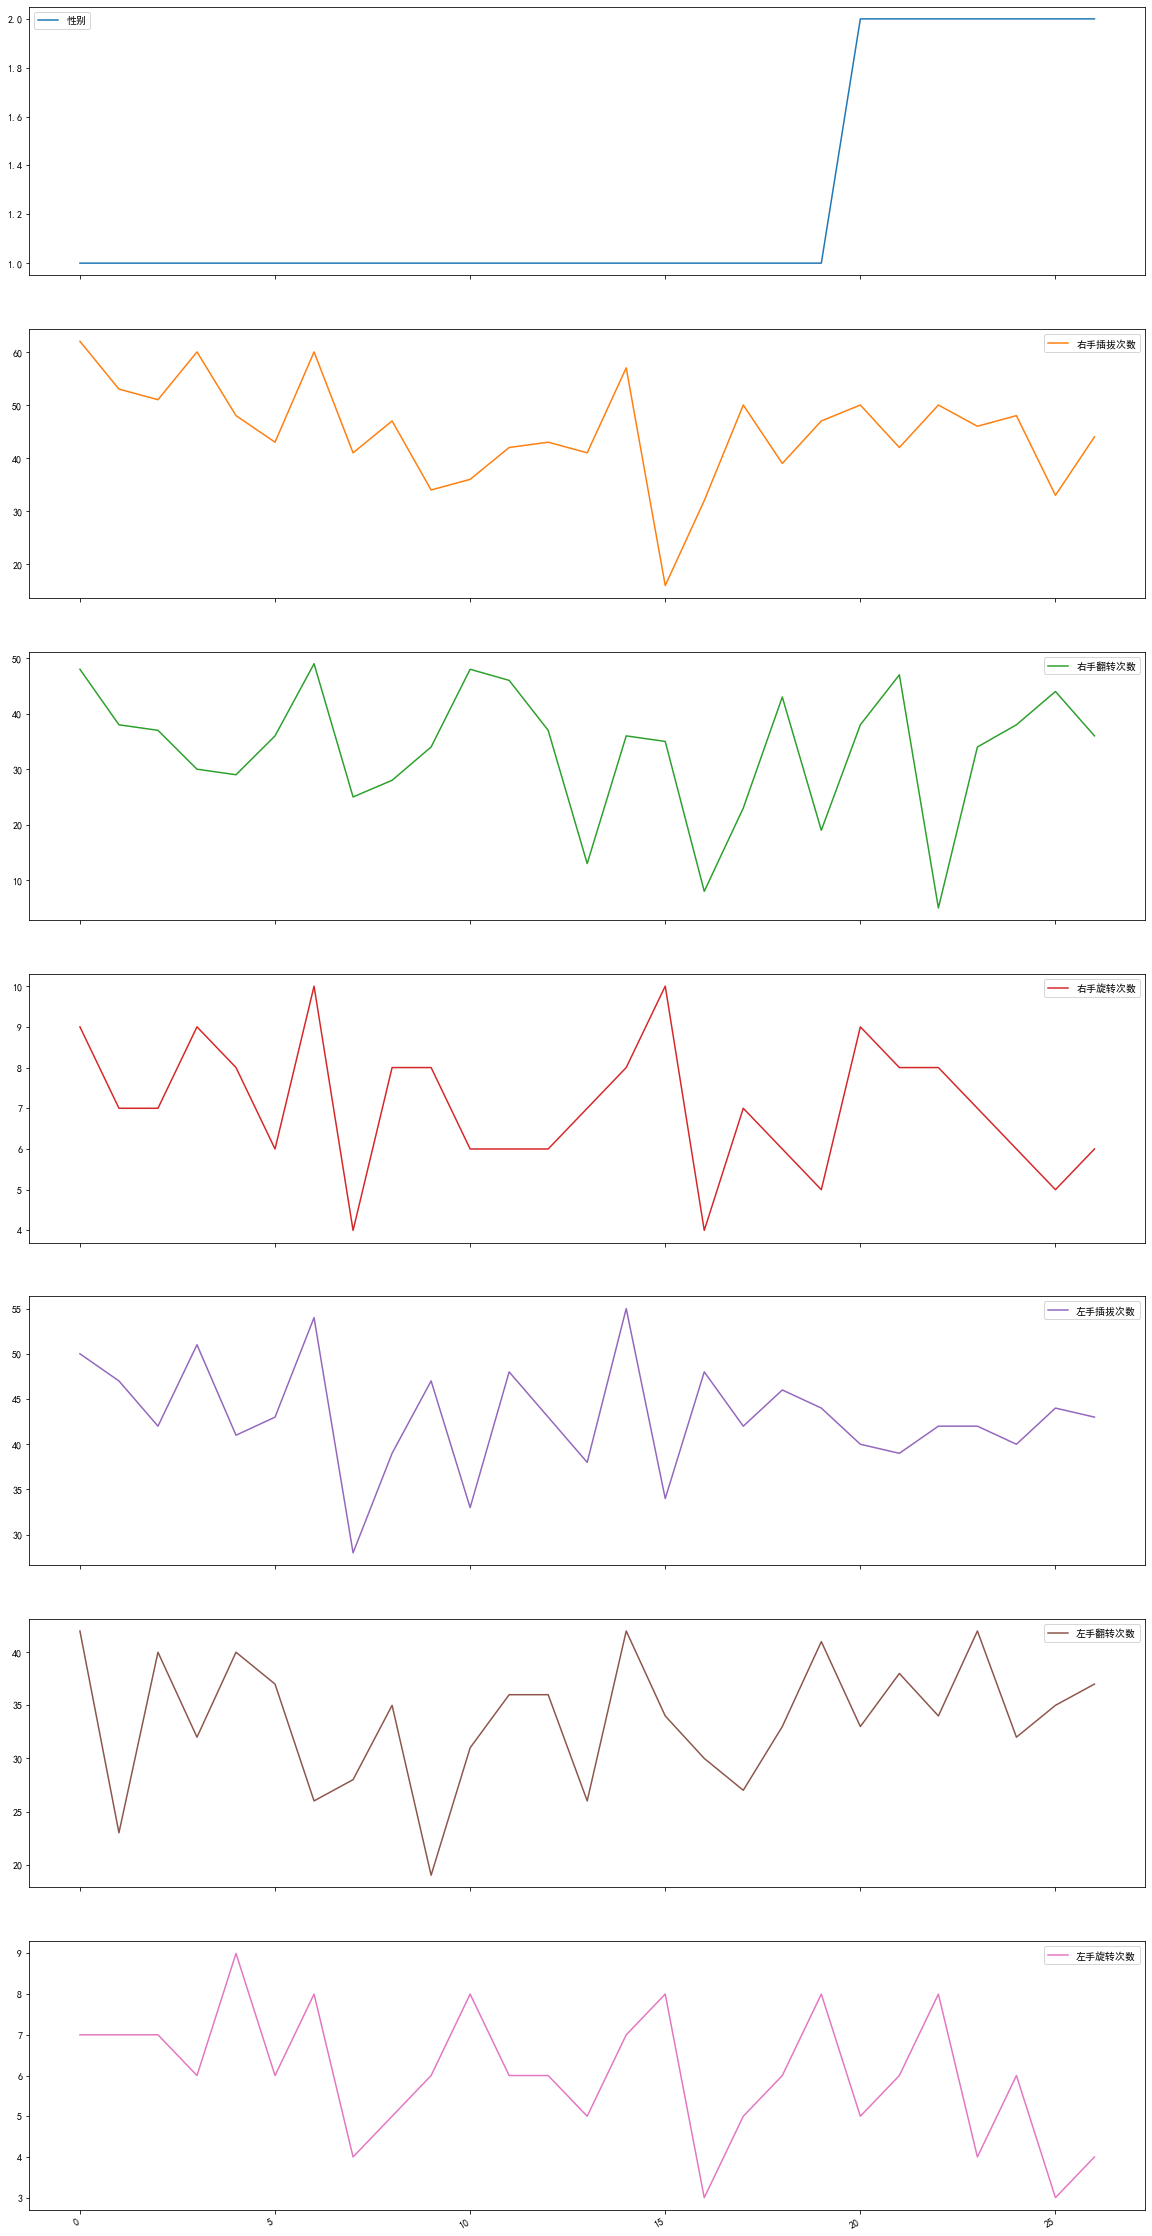

In [17]:
df_minedisease.plot(subplots=True,figsize=(20,45))
plt.show() # 把每个单独的画出来

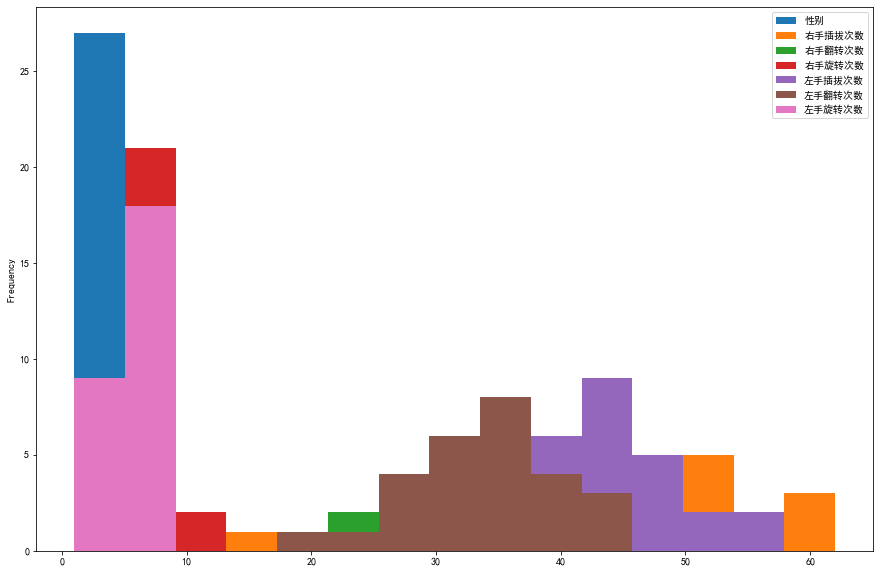

In [18]:
df_minedisease.plot(kind='hist',bins=15) # 用柱状图把每个单独的表示出来

Text(0.5, 1.0, '手指灵活性实验数据集，特征的箱型图')

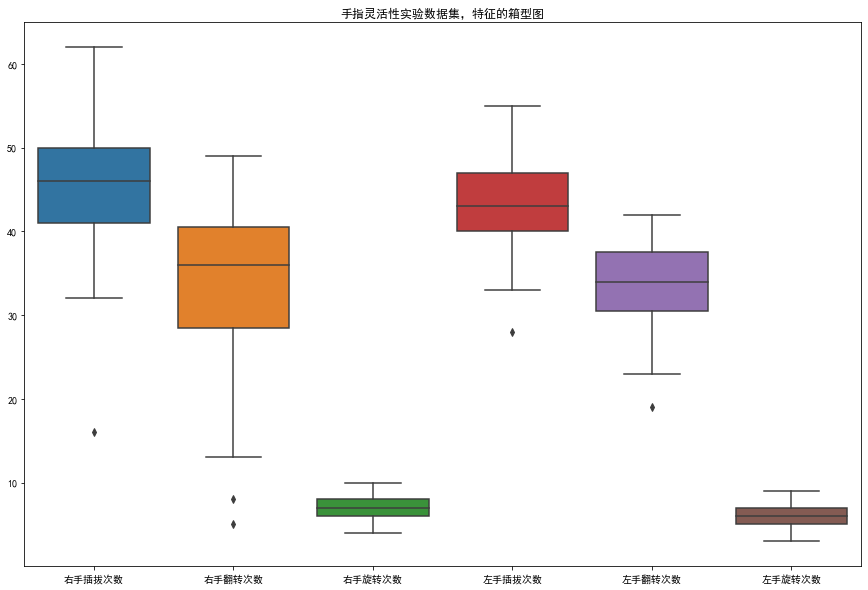

In [21]:
sns.boxplot(data=df_minedisease[['右手插拔次数','右手翻转次数','右手旋转次数','左手插拔次数','左手翻转次数','左手旋转次数']])
plt.title('手指灵活性实验数据集，特征的箱型图')

Text(0.5, 1.0, '手指灵活性实验数据集，特征的小提琴图')

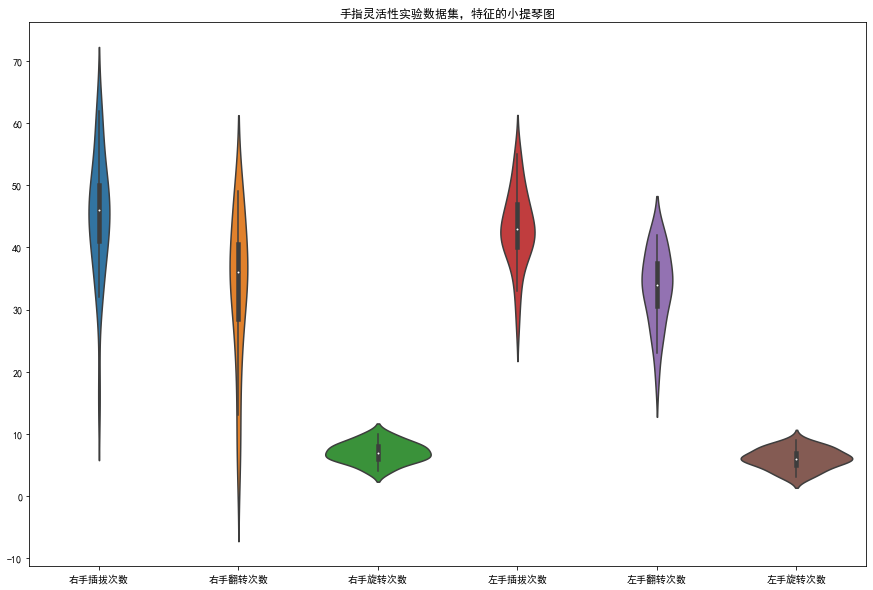

In [23]:
sns.violinplot(data=df_minedisease[['右手插拔次数','右手翻转次数','右手旋转次数','左手插拔次数','左手翻转次数','左手旋转次数']])
plt.title('手指灵活性实验数据集，特征的小提琴图') # 可以很容易看到峰值

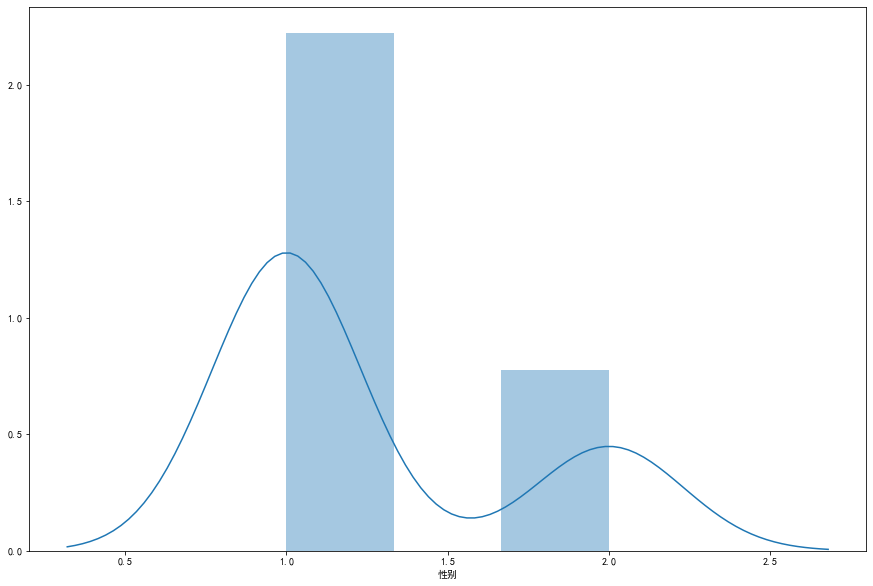

In [24]:
sns.distplot(df_minedisease['性别']) # 既可以画出直方图，又可以画出概率密度曲线

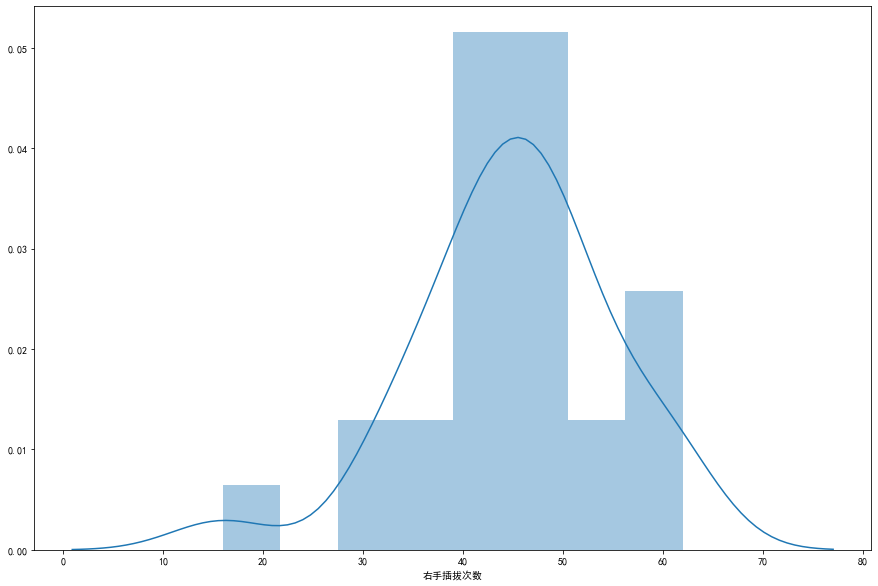

In [25]:
sns.distplot(df_minedisease['右手插拔次数'])

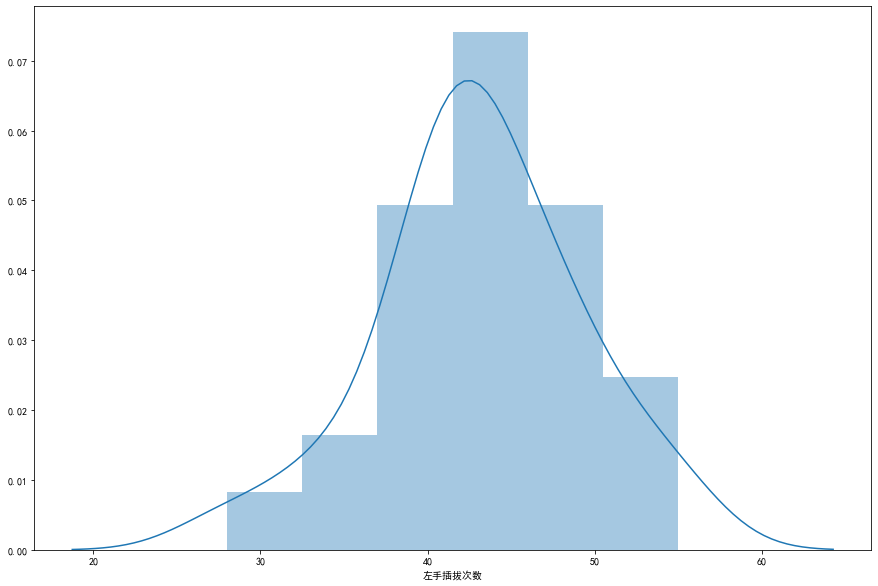

In [26]:
sns.distplot(df_minedisease['左手插拔次数'])

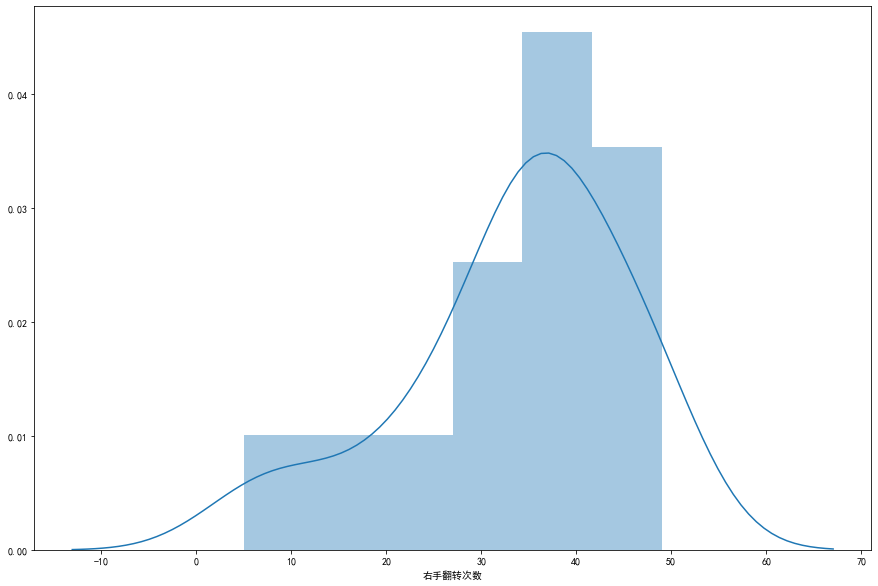

In [27]:
sns.distplot(df_minedisease['右手翻转次数'])

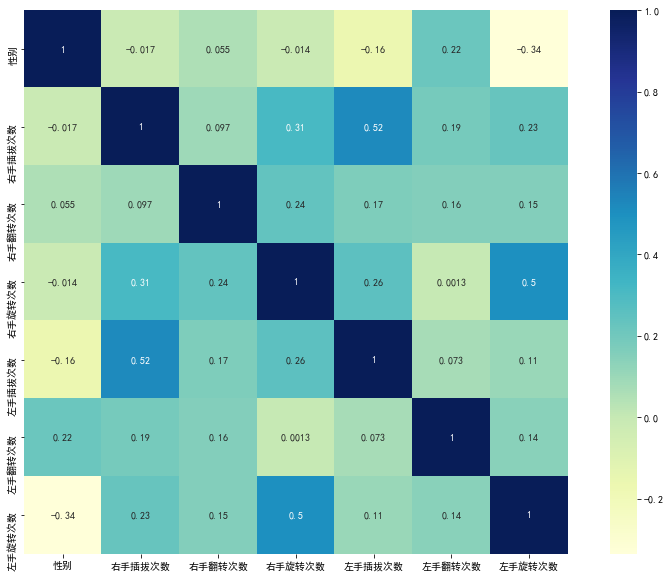

In [28]:
# 绘制变量间相关性系数热力图
sns.heatmap(df_minedisease.corr(),square=True,annot=True,cmap='YlGnBu')

## 把某一个特征和差别阀限的散点图画出来

In [29]:
# 设置绘图大小
plt.style.use({'figure.figsize':(10,8)})

In [30]:
df_minedisease.columns

Index(['性别', '右手插拔次数', '右手翻转次数', '右手旋转次数', '左手插拔次数', '左手翻转次数', '左手旋转次数'], dtype='object')

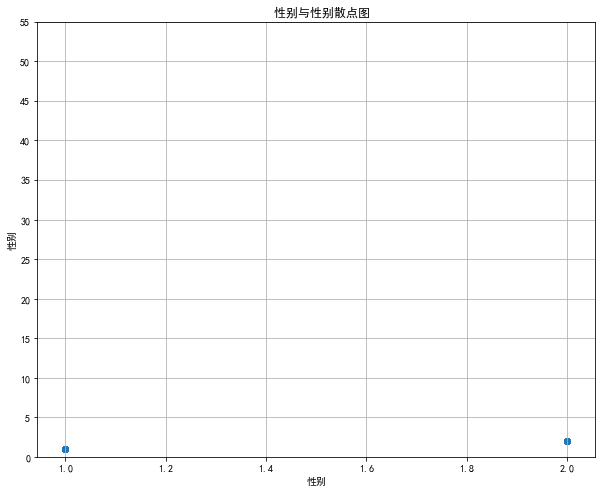

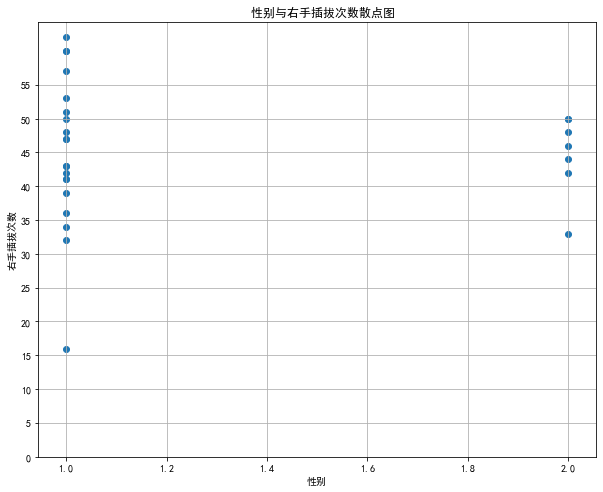

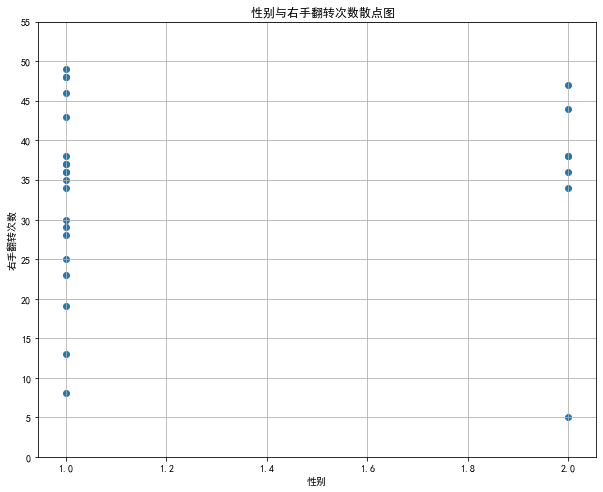

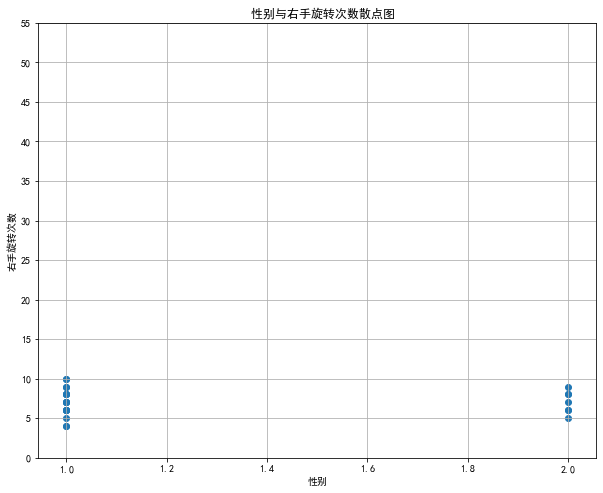

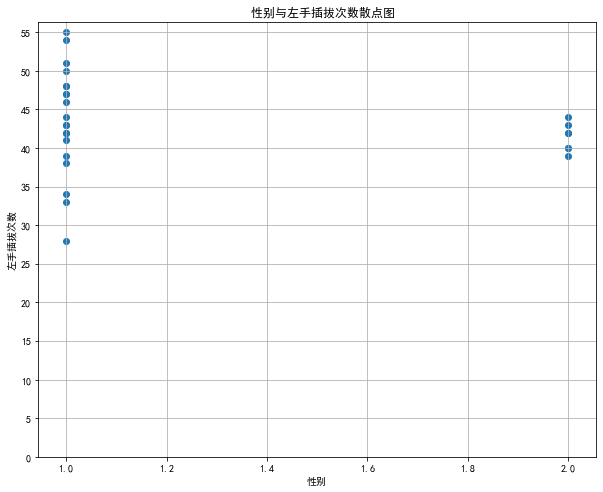

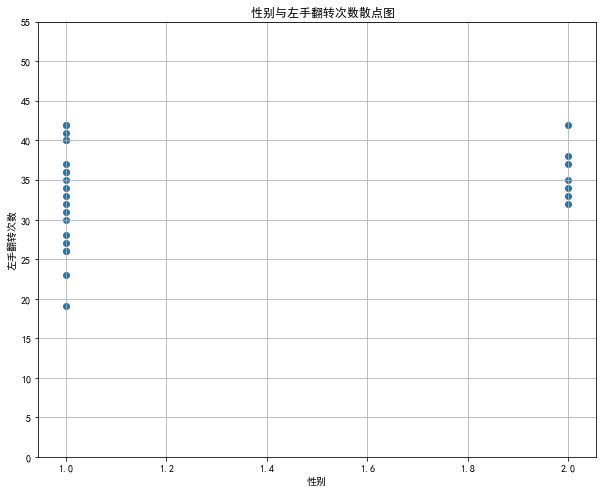

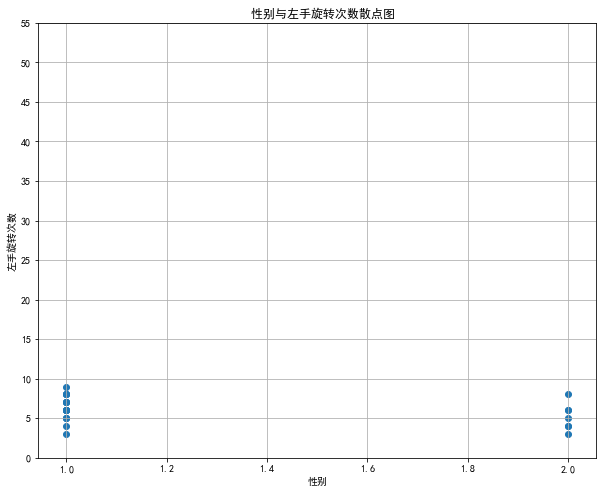

In [33]:
for each in df_minedisease.columns:
    plt.scatter(df_minedisease['性别'],df_minedisease[each])
    plt.title('  性别与{}散点图'.format(each))
    plt.ylabel(each)
    plt.xlabel('性别')
    plt.yticks(range(0,60,5))
    plt.grid()
    plt.show()

# 特征选择

使用与目标变量的相关性强的变量作为最终的特征变量。

通过相关系数法进行特征选择

In [34]:
df_minedisease.head()

,性别,右手插拔次数,右手翻转次数,右手旋转次数,左手插拔次数,左手翻转次数,左手旋转次数
0,1,62,48,9,50,42,7
1,1,53,38,7,47,23,7
2,1,51,37,7,42,40,7
3,1,60,30,9,51,32,6
4,1,48,29,8,41,40,9


In [35]:
# 构造训数据集的特征,把标签这一列删掉
drop_columns = ['性别']
x = df_minedisease.drop(drop_columns, axis=1)

In [36]:
x.head()

,右手插拔次数,右手翻转次数,右手旋转次数,左手插拔次数,左手翻转次数,左手旋转次数
0,62,48,9,50,42,7
1,53,38,7,47,23,7
2,51,37,7,42,40,7
3,60,30,9,51,32,6
4,48,29,8,41,40,9


In [38]:
y = df_minedisease['右手插拔次数']

In [39]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
SelectKBest = SelectKBest(f_regression, k=3)
bestFeature = SelectKBest.fit_transform(x,y)
SelectKBest.get_support()
x.columns[SelectKBest.get_support()]  # 选出三个特征

c:\users\lyw\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:304: RuntimeWarning: divide by zero encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom


Index(['右手插拔次数', '右手旋转次数', '左手插拔次数'], dtype='object')